# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar holerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de holerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('previsao_de_renda.csv')

print('Quantidade total de linhas: {}'.format(len(df)))
print('Número de linhas duplicadas: {}'.format(df.duplicated().sum()))

Quantidade total de linhas: 15000
Número de linhas duplicadas: 0


In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
#verificando quantidade de dados após remoção:
print('Quantidade total de linhas:', len(df), '\n')

print('Quantidade após remoção das linhas duplicadas:',
      len(df.drop_duplicates()), '\n')

df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
df

Quantidade total de linhas: 15000 

Quantidade após remoção das linhas duplicadas: 14547 


,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14542,2016-03-01,16065,M,True,True,0,Assalariado,Secundário,Casado,Casa,30,9.800000,2.0,False,3018.59
14543,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14544,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14545,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [9]:
#Matriz de Correlação

df.corr(numeric_only=True)

,index,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
index,1.000000,-0.008912,-0.100005,0.040731,-0.046570,-0.034059,0.043065,0.130160,-0.001799
posse_de_veiculo,-0.008912,1.000000,-0.014080,0.110330,-0.159355,-0.086039,0.157866,-0.017475,0.061308
posse_de_imovel,-0.100005,-0.014080,1.000000,-0.002239,0.123009,0.000084,-0.006123,-0.021319,0.029957
qtd_filhos,0.040731,0.110330,-0.002239,1.000000,-0.368619,-0.074090,0.895710,0.010093,0.009206
idade,-0.046570,-0.159355,0.123009,-0.368619,1.000000,0.322335,-0.342854,-0.008264,0.042837
tempo_emprego,-0.034059,-0.086039,0.000084,-0.074090,0.322335,1.000000,-0.064750,-0.047191,0.394918
qt_pessoas_residencia,0.043065,0.157866,-0.006123,0.895710,-0.342854,-0.064750,1.000000,-0.000939,0.020118
mau,0.130160,-0.017475,-0.021319,0.010093,-0.008264,-0.047191,-0.000939,1.000000,-0.011331
renda,-0.001799,0.061308,0.029957,0.009206,0.042837,0.394918,0.020118,-0.011331,1.000000


A partir da matriz de correlação, é possível observar que a variável que apresenta maior relação com renda é a variável tempo_emprego, com um índice de correlação de 39%

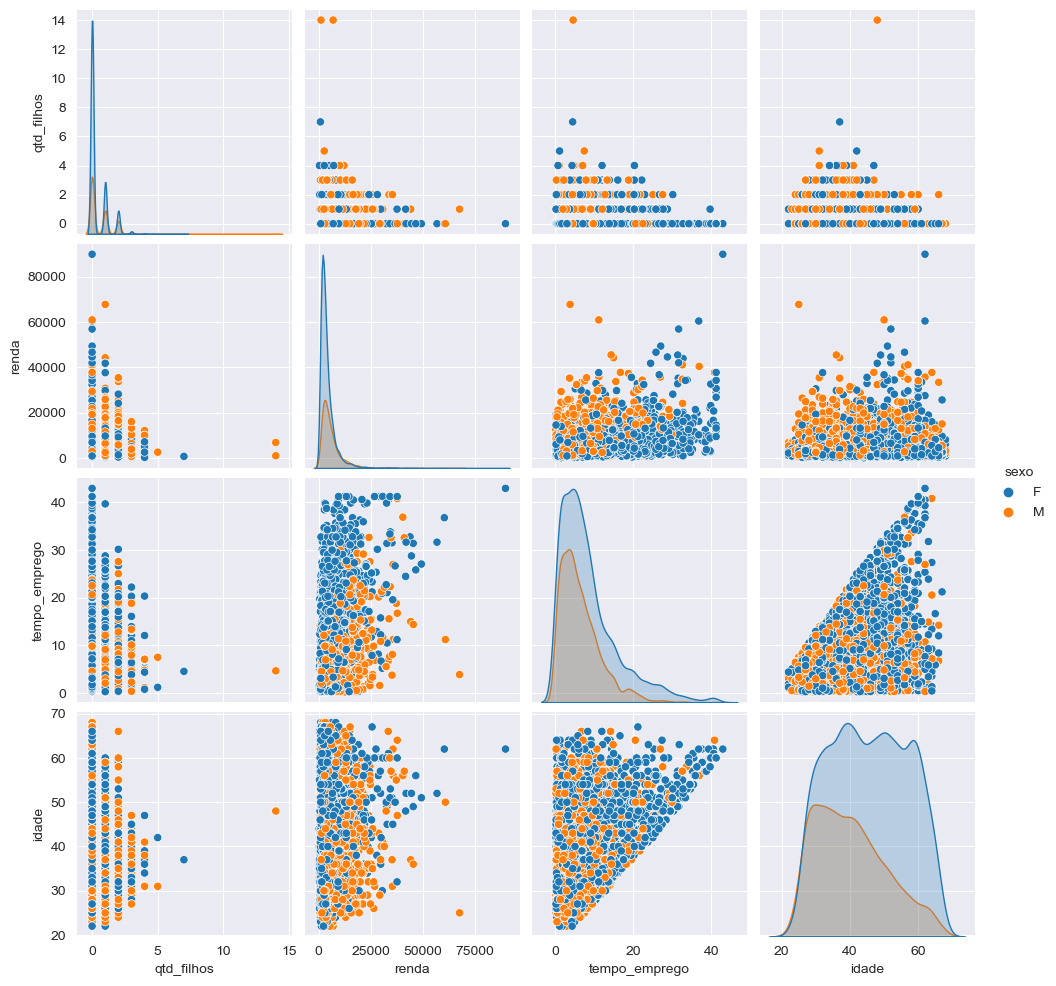

In [10]:
#Matriz de dispersão

sns.pairplot(data=df,
                 hue='sexo',
                 vars=['qtd_filhos',
                       'renda',
                       'tempo_emprego',
                       'idade'])
plt.show()

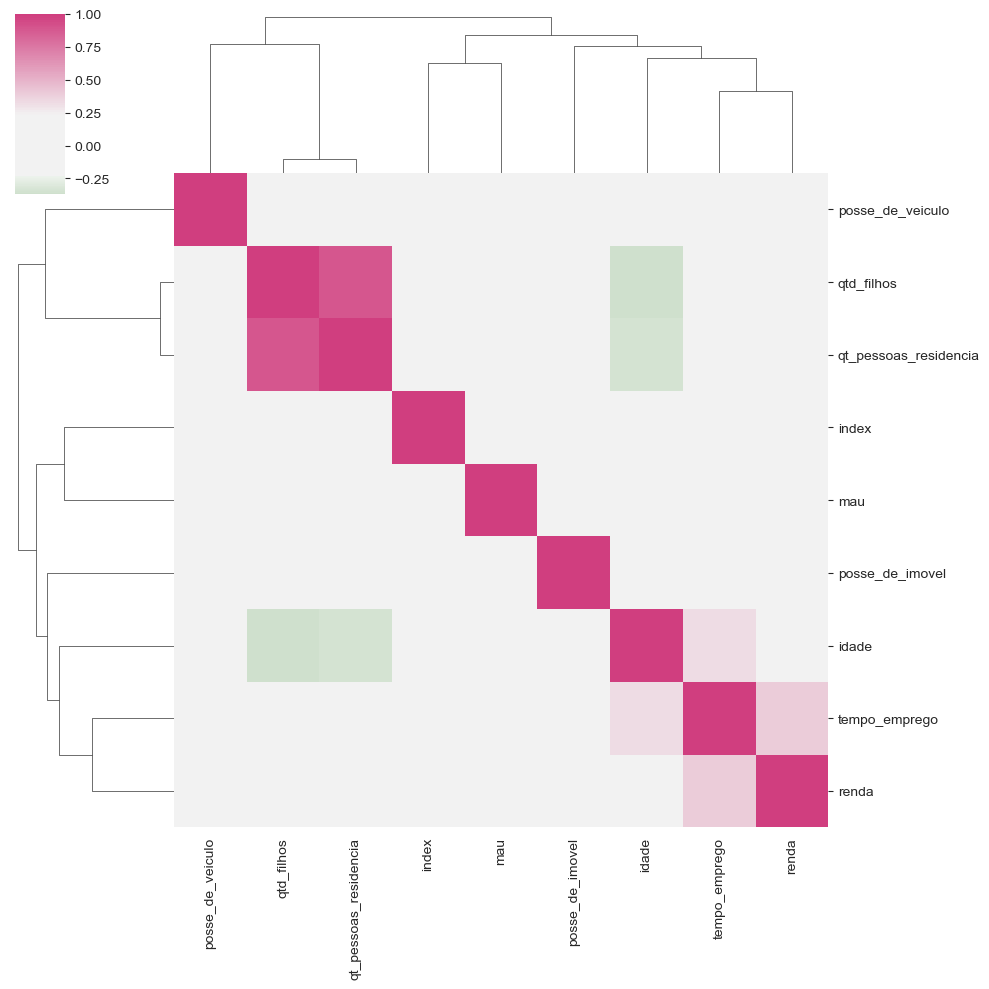

In [11]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(df.corr(numeric_only=True), figsize=(10, 10), center = 0, cmap=cmap)

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<Axes: xlabel='tempo_emprego', ylabel='renda'>

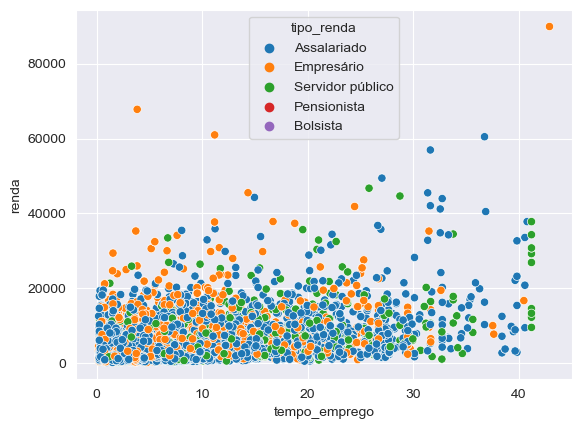

In [12]:
sns.scatterplot(data=df,
                x= 'tempo_emprego',
                y= 'renda',
                hue='tipo_renda'
               )

3) Na sua opinião, há outliers na variável renda?

Sim. Como mencionado anteriormente, há a presença de outliers na variável renda de clientes com o tipo de renda empresarial.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

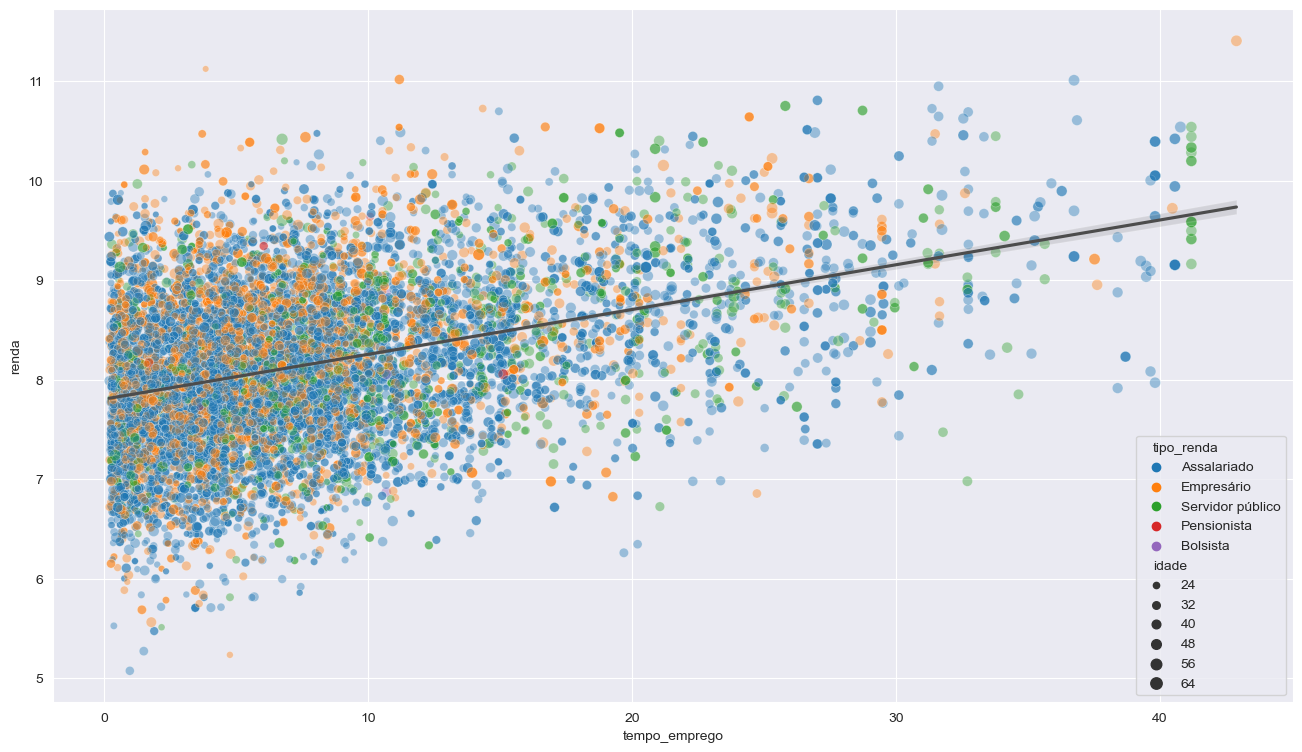

In [13]:
df_log = df.copy()
df_log['renda'] = np.log(df_log['renda'])

plt.figure(figsize=(16,9))

sns.scatterplot(x='tempo_emprego',  # <- 1ª
                y='renda',
                hue='tipo_renda',
                size='idade',  # <- 2ª
                data=df_log,
                alpha=0.4)

# Linha de tendência:
sns.regplot(x='tempo_emprego',
            y='renda',
            data=df_log,
            scatter=False,
            color='.3')

plt.show()

Outra maneira de fazer

In [14]:
#import numpy as np
#df_c = df.copy()
#df_c["log_renda"] = np.log(df_c["renda"])

#plt.figure(figsize=(8, 6))
#sns.scatterplot(data=df_c, y='log_renda', x="idade")
#sns.scatterplot(data=df_c, y='log_renda', x="tempo_emprego")

#plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [18]:
# Diferença após aplicação do LOG:

pd.concat(objs=[df.corr(numeric_only= True).tail(1),
                df_log.corr(numeric_only= True).tail(1)],
          axis=0
          ).reset_index(drop=True).rename(index={1:'renda_log',
                                                 0:'renda'})

,index,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
renda,-0.001799,0.061308,0.029957,0.009206,0.042837,0.394918,0.020118,-0.011331,1.0
renda_log,0.001843,0.088684,0.045165,0.022322,0.025143,0.380039,0.034614,-0.014009,1.0


Sim, e muito visto que agora podemos ver claramente a linha de tendência. Além de na matriz, haver algumas aterações na correlação entre as variáveis, sendo que algumas aumentaram e outras diminuíram